In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import os
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10,9)

from scipy import stats
#from phat import io, ramputils, statutils, plot
from phat import darks, io, ramputils
import makefigures_noise

bestbaselines = open ('../data/paths/best_ever_baseline_darks_8_21_2022.txt', 'r').read().splitlines()[1:]



In [35]:
def load_dark ( dark_index, gain=None, cindices=None, **kwargs ):
    if gain is None:
        gain = 2.26 # e/ADU
    if cindices is None:
        cindices = np.logspace(1,np.log10(299),10).astype(int)
    dr = darks.DarkRamp ( io.jhu2tiger(bestbaselines[dark_index]) )
    bundle = dr.ols ( gain=gain, exptime=None, **kwargs)    
    return bundle

In [72]:
bundleA = load_dark ( 10, frametype='data' )


IDX0 [1 sec]
IDX50 [18 sec]
IDX100 [32 sec]
IDX150 [45 sec]
IDX200 [74 sec]
IDX250 [101 sec]
Completed in 128 sec


In [73]:
bundleB = load_dark ( 11, frametype='data' )

IDX0 [1 sec]
IDX50 [18 sec]
IDX100 [33 sec]
IDX150 [46 sec]
IDX200 [71 sec]
IDX250 [97 sec]
Completed in 124 sec


Median rate: 0.0068 e/s
Expected shot noise: 3 e
Observed total RMS: 8 e
SQRT[RMS^2 - shot^2] = 8.34 e
column subtracted
Median rate: 0.0068 e/s
Expected shot noise: 3 e
Observed total RMS: 7 e
SQRT[RMS^2 - shot^2] = 6.34 e


(<Figure size 1008x360 with 4 Axes>, <Figure size 1512x360 with 6 Axes>)

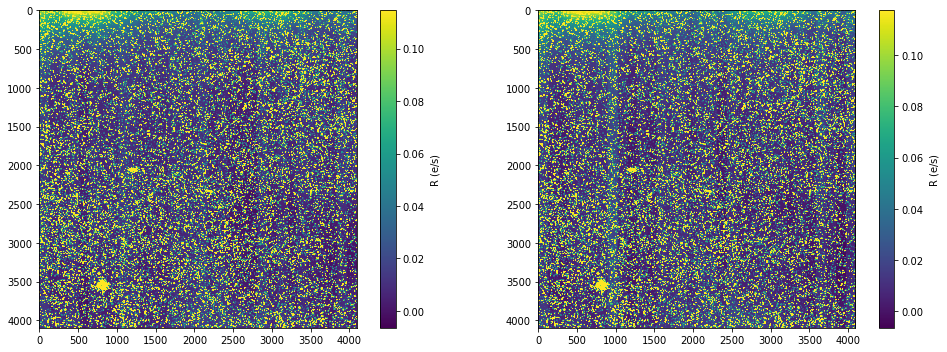

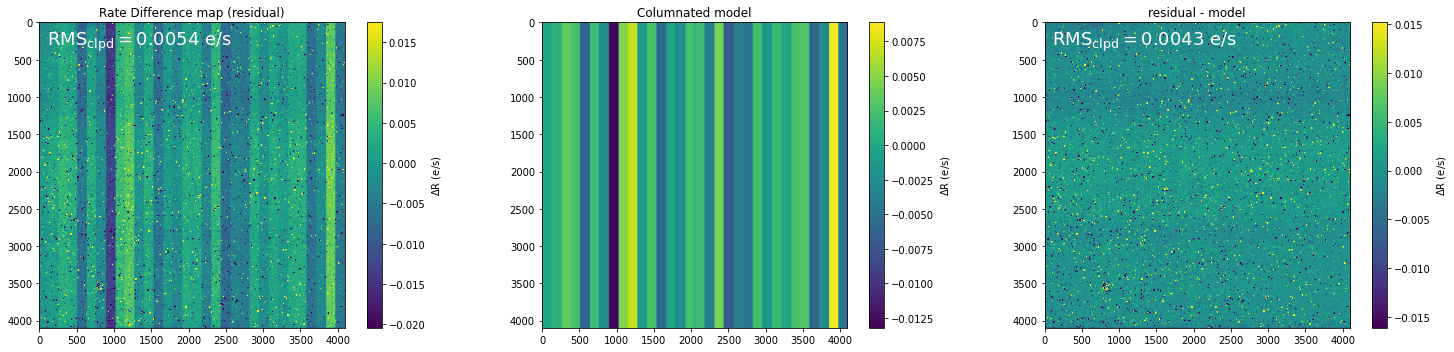

In [74]:
makefigures_noise.show_r2rdiff (bundleA.rate_arr[-1], bundleB.rate_arr[-1], exptime, bundleA.indices[-1] )

In [75]:
%%time
rmsAB = ramputils.rate_rms (bundleA.rate_arr, bundleB.rate_arr )

CPU times: user 10.4 s, sys: 4.36 s, total: 14.7 s
Wall time: 14.8 s


In [76]:
exptime = bundleA.exptime
shot_noise = np.sqrt(abs(np.median(bundleA.rate_arr, axis=(1,2))) * exptime * bundleA.indices)
se_c = np.nanmedian(bundleA.rateSE_arr,axis=(1,2))

pred = np.sqrt((se_c * exptime*bundleA.indices)**2 + shot_noise**2)
obs = rmsAB * exptime * bundleA.indices

obs/pred

array([1.25553024, 1.19439777, 0.90101028, 0.85724075, 1.49232749,
       1.19045985, 1.62239268, 1.69649836, 1.1892178 , 1.2630597 ])

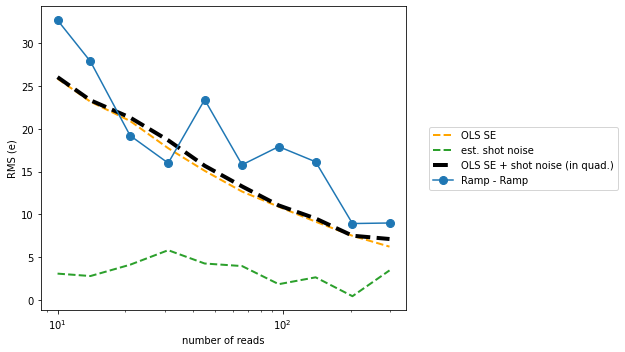

In [78]:
fig, axarr = plt.subplots(1,2,figsize=(14,5))
fig.delaxes(axarr[1])
ax = axarr[0]
ax.plot(cindices, se_c * exptime * cindices, ls='--',lw=2, color='orange', label='OLS SE')
ax.plot(cindices, shot_noise, ls='--', lw=2, color='tab:green', label='est. shot noise')
ax.plot(cindices, np.sqrt((se_c * exptime*cindices)**2 + shot_noise**2), ls='--', lw=4, color='k',
        label='OLS SE + shot noise (in quad.)')


ax.plot(cindices, rmsAB * exptime * cindices, 'o-', markersize=8, color='tab:blue', label='Ramp - Ramp' )

#ax.plot(cindices, rmsAB_modsub * exptime*cindices, 'o-', markersize=8, color='tab:red',
#        label = 'Ramp - Ramp - model')
#ax.yscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0., .1,1.))
ax.set_xscale('log')
ax.set_xlabel("number of reads")
ax.set_ylabel("RMS (e)")

plt.tight_layout ()
